### Learn matplotlib animation!
The goal: let's wrap a sine wave around a circle and make it wiggle

First, we have to import a few libraries...

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation

from IPython.display import HTML

%matplotlib inline

### Step 1: plot a circle
The equation for a circle of given radius
$x^2 + y^2 = r$

We want to plot this with $x$ and $y$ points, we'll use some trigonometry

$sin^2(\theta) + cos^2(\theta) = 1^2 = 1$

<div>
<img src="trig_identity_reference.png" width="650"/>
</div>


The unit circle is thus given by...

$x = cos(\theta)$

$y = sin(\theta)$

I will express all angles in radians in this notebook

In [2]:
def get_equally_spaced_angles(number_of_points):
    angles = np.linspace(0, 2*np.pi, number_of_points)
    return angles

def angles_to_circle(angles):
    x = np.cos(angles)
    y = np.sin(angles)
    return x, y
    
def get_x_y_theta_unit_circle(number_of_points):
    theta = get_equally_spaced_angles(number_of_points)
    x, y = angles_to_circle(theta)
    return x, y, theta

In [3]:
n = 50
x, y, theta = get_x_y_theta_unit_circle(n)

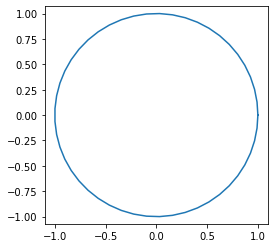

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
ax.axis('equal')
circle = ax.plot(x, y)

n.b. we plotted as a line above, plot to points using `matplotlib.axes.Axes.scatter`

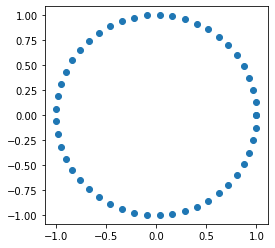

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
ax.axis('equal')
points = ax.scatter(x, y)

### Step 2: Changing the radius of the circle
If we want to wrap a sine wave around the circle, we need a way to change its radius at each point

I will refer to the this as `oscillation_amplitude`, you'll see why later

In [6]:
oscillation_amplitude = 0.1
x_displacement = oscillation_amplitude * np.cos(theta)
y_displacement = oscillation_amplitude * np.sin(theta)

We can then obtain new $x$ and $y$ positions by adding our displacements to our original $x$ and $y$ positions 

In [7]:
x_displaced = x + x_displacement
y_displaced = y + y_displacement

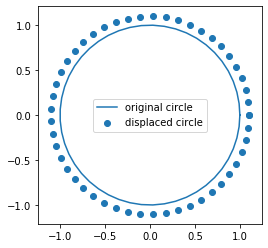

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
ax.axis('equal')
circle = ax.plot(x, y, label='original circle')
points = ax.scatter(x_displaced, y_displaced, label='displaced circle')
legend = ax.legend()

### Step 3: Make a sine wave around the circle
For this, we need the displacements to change as a function of $\theta$

Luckily our $x$ and $y$ are already described as a function of $\theta$!

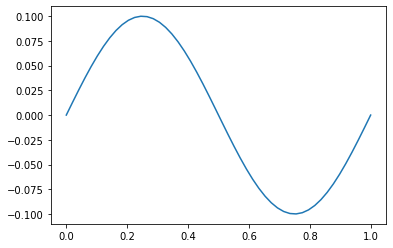

In [9]:
oscillation_amplitude = 0.1
displacements = oscillation_amplitude * np.sin(theta)
fig, ax = plt.subplots()
line = ax.plot(theta / (2*np.pi), displacements)

We need to decompose these displacement into their $x$ and $y$ components to be able to add them to our $x$ and $y$ vectors

if desired displacement at a given angle is $\Delta_\theta$ then the $x$ and $y$ components of $\Delta_\theta$ ($\delta x_\theta$ and $\delta y_\theta$) are given below...


**For the $x$ component**

$$cos(\theta) = \frac{\delta x_\theta}{\Delta_\theta}$$

$$ \delta x_\theta = \Delta_\theta cos(\theta)  $$
 


**And for $y$ component**

$$ sin(\theta) = \frac{\delta y_\theta}{\Delta_\theta} $$

$$ \delta y_\theta = \Delta_\theta sin(\theta) $$



In [10]:
def decompose_displacement(displacement, theta):
    dx = displacement * np.cos(theta)
    dy = displacement * np.sin(theta)
    return dx, dy

The sum of dx and dy should always be equal to the absolute value of displacement

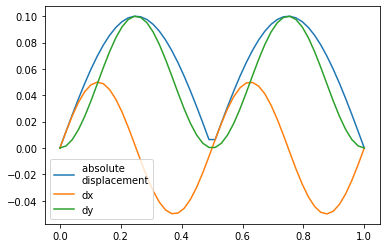

In [11]:
dx, dy = decompose_displacement(displacements, theta)

fig, ax = plt.subplots()

line_displacements = ax.plot(theta / (2*np.pi), np.abs(displacements), label='absolute \ndisplacement')
line_dx = ax.plot(theta / (2*np.pi), dx, label='dx')
line_dy = ax.plot(theta / (2*np.pi), dy, label='dy')
legend = ax.legend()

Now that we have $\delta x_\theta$ and $\delta y_\theta$ we can add these to our $x$ and $y$ values to obtain our sine wave oscillating around the circle

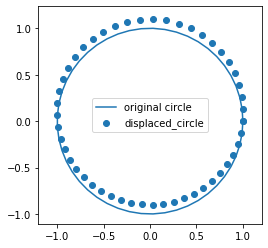

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
ax.axis('equal')
circle = ax.plot(x, y, label='original circle')
points = ax.scatter(x + dx, y + dy, label='displaced_circle')
legend = ax.legend()

#### Step 4: Make the sine wave going around the circle oscillate at different frequencies
If the sine wave oscillates an integer number of times from the beginning to the end of the circle we will get a nice continuous set of points

In [13]:
def get_displacements(oscillation_amplitude, oscillation_frequency, theta):
    displacements = oscillation_amplitude * np.sin(oscillation_frequency * theta)
    return displacements

oscillation_amplitude = 0.1
oscillation_frequency = 7

displacements = get_displacements(oscillation_amplitude, oscillation_frequency, theta)

dx, dy = decompose_displacement(displacements, theta)

x_displaced = x + dx
y_displaced = y + dy

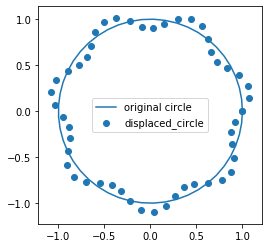

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(4,4)
ax.axis('equal')
circle = ax.plot(x, y, label='original circle')
points = ax.scatter(x_displaced, y_displaced, label='displaced_circle')
legend = ax.legend()
# points = ax.scatter(x_points_offset, y_points_offset, c=offsets, cmap='coolwarm')

### Step 5: Pack all of this up into a function

Let's now define a couple of useful functions to pack all of this together

In [15]:
def sine_around_circle(number_of_points, oscillation_amplitude, oscillation_frequency):
    x, y, theta = get_x_y_theta_unit_circle(number_of_points)
    displacements = get_displacements(oscillation_amplitude, oscillation_frequency, theta)
    dx, dy = decompose_displacement(displacements, theta)
    x += dx
    y += dy
    return x, y

In [16]:
def draw(x, y, ax):
    ax.axis('equal')
    ax.set_xlim(-1.8, 1.8)
    ax.set_ylim(-1.8, 1.8)
    ax.axis('off')
    points = ax.plot(x, y)
    return points

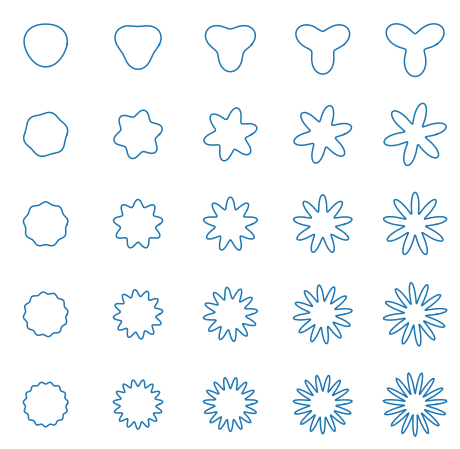

In [17]:
fig, axes = plt.subplots(5,5)
fig.set_size_inches(8,8)

amplitudes = np.linspace(0.05, 0.5, 5)
frequencies = 3*(np.arange(5) + 1)
number_of_points = 150

for row in range(5):
    for column in range(5):
        current_frequency = frequencies[row]
        current_amplitude = amplitudes[column]
        current_axis = axes[row][column]
            
        x, y = sine_around_circle(number_of_points, current_amplitude, current_frequency)
        draw(x, y, current_axis)


### Step 6: Introduce a way to shift the sine wave
To animate the signal oscillating, we need to introduce a way to shift the signal

Let's introduce the shift into the displacements, this means each point will move back and forth towards the origin

In [18]:
def get_displacements(oscillation_amplitude, oscillation_frequency, theta, t):
    displacements = oscillation_amplitude * np.sin((oscillation_frequency * theta) + t)
    return displacements

Now let's redefine our function for calculating the positions of the points so that it can apply our phase shift

In [19]:
def sine_around_circle_t(number_of_points, oscillation_amplitude, oscillation_frequency, t):
    x, y, theta = get_x_y_theta_unit_circle(number_of_points)
    displacements = get_displacements(oscillation_amplitude, oscillation_frequency, theta, t)
    dx, dy = decompose_displacement(displacements, theta)
    x += dx
    y += dy
    return x, y

Let's check that this does seem to work on a simple curve before we try to do any animation

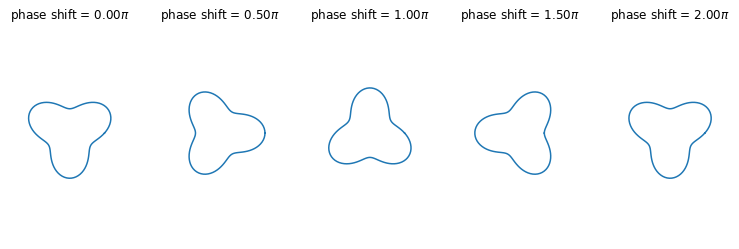

In [20]:
n_time_points = 5
t = np.linspace(0, 2*np.pi, n_time_points)

fig, axes = plt.subplots(1, n_time_points)
fig.set_size_inches(13,4)

for i in range(n_time_points):
    current_axis = axes[i]
    current_t = t[i]
    current_axis.set_title(f'phase shift = {current_t/np.pi:.2f}'+ r'$\pi$')
    x, y = sine_around_circle_t(120, 0.3, 3, current_t)
    draw(x, y, current_axis)

### Step 7: Animate

Let's animate this phase shift so we can see the sine wave oscillate around the circle!

We'll use `matplotlib.animation.FuncAnimation` to achieve this

We need...
1. an initialised figure
2. a function to update the figure at each frame

Let's first write a function to initialise our figure

In [21]:
def initialise_figure(n_points_in_circle, oscillation_amplitude, oscillation_frequency):
    x, y = sine_around_circle_t(n_points_in_circle, oscillation_amplitude, oscillation_frequency, current_t)
    theta = get_equally_spaced_angles(n_points_in_circle)
    displacements = get_displacements(oscillation_amplitude, oscillation_frequency, theta, np.pi/2)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(13,8)
    
    ax.axis('equal')    
    ax.set_axis_off()
    
    lim = 1.2 + oscillation_amplitude
    ax.set_xlim((-lim, lim))
    ax.set_ylim((-lim, lim))
    
    points = ax.scatter(x, y, s=250, c=displacements, cmap='RdYlBu', linewidth=4)
    points.set_edgecolor('k')
    
    return fig, ax, points

Then another function to draw the new frame `t`

In [22]:
def animation_frame(t):
    x, y = sine_around_circle_t(n_points_in_circle, oscillation_amplitude, oscillation_frequency, t)
    positions = np.vstack((x,y)).transpose()
    points.set_offsets(positions)
    return points, 

Our function for displacements, the sine function, has a period of $2\pi$

let's animate it from t = 0 to t = $2\pi$

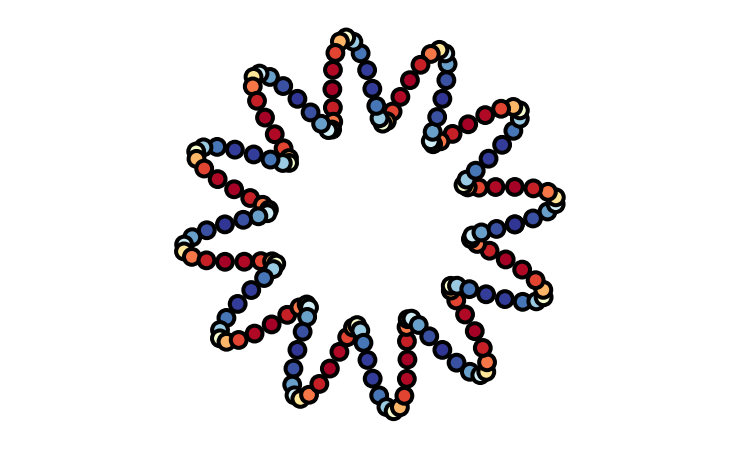

In [23]:
frames = np.arange(0, 2*np.pi, 0.01) 

n_points_in_circle = 175
oscillation_amplitude = 0.3
oscillation_frequency = 12

fig, ax, points = initialise_figure(n_points_in_circle, oscillation_amplitude, oscillation_frequency)

animation = matplotlib.animation.FuncAnimation(fig, func=animation_frame, frames=frames, interval=10)

HTML(animation.to_html5_video())

### Step 8: Further things to play with...
 - the number of points
 - the oscillation frequency of your displacement signal
 - the amplitude of oscillation
 - change the get_displacements function, maybe to a combination of sine waves with different amplitudes and phases
 - rather than moving the points, change the colour as a function of the displacement

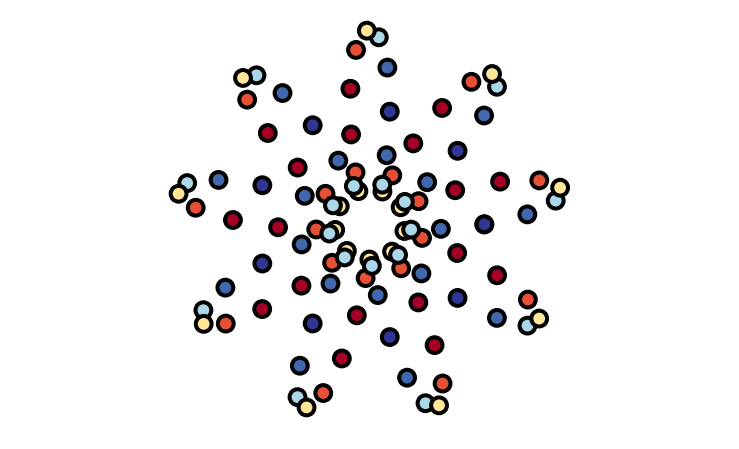

In [39]:
frames = np.arange(0, 2*np.pi, 0.01) 

n_points_in_circle = 100
oscillation_amplitude = 0.7
oscillation_frequency = 9

fig, ax, points = initialise_figure(n_points_in_circle, oscillation_amplitude, oscillation_frequency)

animation = matplotlib.animation.FuncAnimation(fig, func=animation_frame, frames=frames, interval=10)

HTML(animation.to_html5_video())

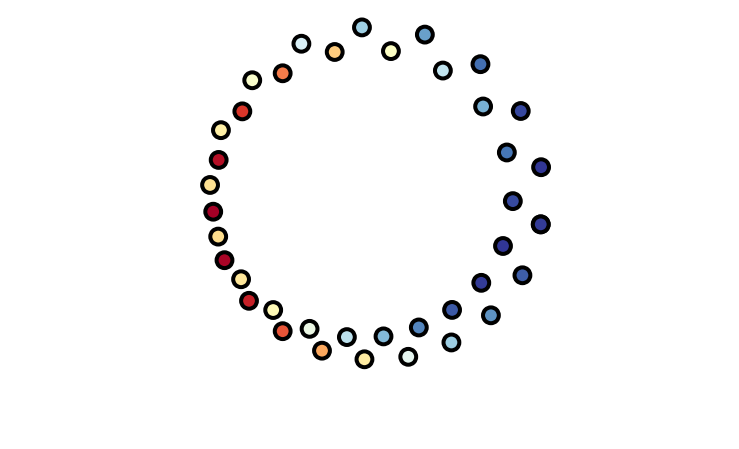

In [72]:
def get_displacements(oscillation_amplitude, oscillation_frequency, theta, t):
    displacements = oscillation_amplitude * ((np.sin((oscillation_frequency * theta) + t) + 
                                             (0.5 * np.cos((-0.5 * oscillation_frequency * theta) + t))))
    return displacements

frames = np.arange(0, 2*np.pi, 0.01) 

n_points_in_circle = 40
oscillation_amplitude = 0.2
oscillation_frequency = 40

fig, ax, points = initialise_figure(n_points_in_circle, oscillation_amplitude, oscillation_frequency)

animation = matplotlib.animation.FuncAnimation(fig, func=animation_frame, frames=frames, interval=5)

HTML(animation.to_html5_video())                                           